In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import genesis
nltk.download('genesis')
nltk.download('wordnet')
genesis_ic = wn.ic(genesis, False, 0.0)

#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error, r2_score
from sklearn import model_selection, naive_bayes, svm
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec
from nltk import pos_tag
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
import os
import sys
import numpy
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder

from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer
from tensorflow.keras import Model
from sklearn import linear_model

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Vamos a usar la base de datos que se encuentra en Google Drive por ello usamos el siguiente comando: 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Nuestra base de datos se va a llamar df_train

In [ ]:
df_train=pd.read_csv('/content/gdrive/My Drive/PAEV1 - Final.csv')

In [ ]:
df_test=pd.read_csv('/content/gdrive/My Drive/PAEV1 - Problemas.csv')

Análisis exploratorio de los datos 

In [ ]:
df_train.describe()

,Problema,Clase
count,604,604
unique,604,4
top,Amparo tiene 5 lapices y le da 2 a Israel ¿Cuá...,Cambio
freq,1,157


Cambio         157
Combinación    153
Igualación     150
Comparación    144
Name: Clase, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


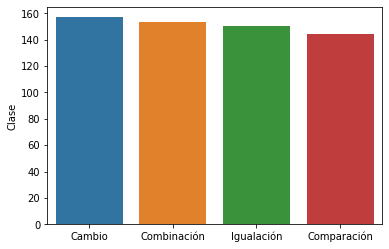

In [ ]:
x=df_train['Clase'].value_counts()
print(x)
sns.barplot(x.index,x)

In [ ]:
df_train['word_count'] = df_train['Problema'].apply(lambda x: len(str(x).split()))
print(df_train[df_train['Clase']=="Igualación"]['word_count'].mean()) #Problemas de igualación
print(df_train[df_train['Clase']=="Combinación"]['word_count'].mean()) #Problemas de combinación
print(df_train[df_train['Clase']=="Cambio"]['word_count'].mean()) #Problemas de igualación
print(df_train[df_train['Clase']=="Comparación"]['word_count'].mean()) #Problemas de comparación

25.933333333333334
20.92156862745098
19.97452229299363
21.65277777777778


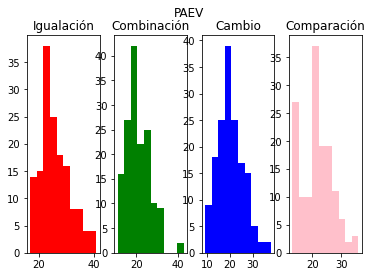

In [ ]:
# CONTEO DE PALABRAS
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4)
train_words=df_train[df_train['Clase']=="Igualación"]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Igualación')
train_words=df_train[df_train['Clase']=="Combinación"]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Combinación')
train_words=df_train[df_train['Clase']=="Cambio"]['word_count']
ax3.hist(train_words,color='blue')
ax3.set_title('Cambio')
train_words=df_train[df_train['Clase']=="Comparación"]['word_count']
ax4.hist(train_words,color='pink')
ax4.set_title('Comparación')
fig.suptitle('PAEV')
plt.show()

In [ ]:
# NÚMERO DE LETRAS
df_train['char_count'] = df_train['Problema'].apply(lambda x: len(str(x)))
print(df_train[df_train['Clase']=="Combinación"]['char_count'].mean())
print(df_train[df_train['Clase']=="Igualación"]['char_count'].mean()) 
print(df_train[df_train['Clase']=="Cambio"]['char_count'].mean())
print(df_train[df_train['Clase']=="Combinación"]['char_count'].mean())

115.05228758169935
147.14
111.171974522293
115.05228758169935


In [ ]:
df_train.isnull()

,Problema,Clase,word_count,char_count
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
599,False,False,False,False
600,False,False,False,False
601,False,False,False,False
602,False,False,False,False


Realizamos el procesamiento de texto 


In [ ]:
#convertir a minúsculas, quitar y eliminar puntuaciones
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

 
# ELIMINACIÓN DE PALABRAS DE PARO
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)
#LEMMATIZATION
# Inicializar el lemmatizer(
wl = WordNetLemmatizer()

# Esta es una función auxiliar para mapear etiquetas de posición NTLK
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenizar la oración
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Coge la posición 
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)

def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))


In [ ]:
df_train['clean_text'] = df_train['Problema'].apply(lambda x: finalpreprocess(x))

Mostramos como que queda nuestra variable 'Clean_text' que sera la que este "limpia"

In [ ]:
df_train['clean_text']

0      amparo tiene lapices le da israel cuántas le q...
1      ana pesaba kilo ha engordado kilo cuánto pesa ...
2      ana su hermana tenían ahorrados euro se han ga...
3      andrés tenía tazos después de jugar ha reunido...
4      andrés tenía tazos después de jugar le quedan ...
                             ...                        
599    un panadero tiene que repartir barras de pan s...
600    un panadero vende roscas de pan si vende barra...
601    una caja de manzanas pesa kilogramos otra caja...
602    una manada de cebras están bebiendo en el lado...
603    una torre que mide metro de alta tiene ladrill...
Name: clean_text, Length: 604, dtype: object

Una vez que tenemos esto, dividimos el dataset en train y test 

In [ ]:
#SPLITTING THE TRAINING DATASET INTO TRAIN AND TEST
X_train, X_test, y_train, y_test = train_test_split(df_train["clean_text"],df_train["Clase"],test_size=0.2,shuffle=True)
#Word2Vec
# Word2Vec runs on tokenized sentences
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  
X_test_tok= [nltk.word_tokenize(i) for i in X_test]

In [ ]:
#Tf-Idf
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) 
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)
#building Word2Vec model
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        # if a text is empty we should return a vector of zeros
        # with the same dimensionality as all the other vectors
        #self.dim = len(word2vec.itervalues().next())
        self.dim = 100

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [ ]:
df_train['clean_text_tok']=[nltk.word_tokenize(i) for i in df_train['clean_text']]   
model = Word2Vec(df_train['clean_text_tok'],min_count=1)
w2v=dict(zip(model.wv.index2word,model.wv.vectors))
modelw=MeanEmbeddingVectorizer(w2v)

# converting text to numerical data using Word2Vec
X_train_vectors_w2v=modelw.transform(X_train_tok)
X_test_vectors_w2v = modelw.transform(X_test_tok)

Regresión lineal 

Transformanos las variables cateogoricas a numéricas para poner usarlas en el modelo lineal 

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

values = array(y_train)
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(values)
print(y_train_encoded)

values2 = array(y_test)
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(values2)
print(y_test_encoded)


[0 1 1 0 3 1 3 2 0 0 0 3 2 3 1 1 2 3 3 1 1 1 2 3 1 3 2 0 2 1 2 1 2 2 2 3 0
 1 2 2 0 3 1 3 1 0 1 0 2 0 0 0 2 2 3 1 3 3 0 2 1 2 2 1 0 1 3 3 0 1 3 1 2 1
 0 3 2 1 2 1 2 2 1 0 0 0 2 1 2 3 3 3 3 0 0 3 2 2 1 3 1 0 1 0 1 1 1 3 2 2 1
 3 2 0 2 1 1 1 3 3 0 1 0 3 0 0 2 0 3 1 3 1 1 3 2 0 0 2 0 1 1 1 3 2 2 3 3 1
 2 0 2 2 0 3 2 0 3 0 0 2 1 1 3 1 2 2 2 0 3 3 0 1 3 0 1 3 3 0 0 1 1 2 2 3 2
 2 0 2 3 0 0 0 1 0 0 0 1 2 1 2 2 1 3 0 3 1 3 3 2 0 1 3 3 1 2 3 3 0 0 0 1 1
 3 0 1 1 2 1 1 3 0 2 2 1 2 3 1 2 3 1 3 1 0 1 1 1 0 2 3 3 2 0 2 2 3 3 1 1 1
 0 0 3 3 2 2 0 0 2 3 1 2 2 3 2 3 0 2 3 1 0 2 2 2 3 0 0 2 2 0 1 0 1 1 1 3 3
 1 3 0 3 2 2 0 3 3 2 3 1 2 3 2 1 1 1 3 0 1 1 3 2 0 0 1 2 1 1 3 3 1 1 0 3 2
 2 0 2 3 3 3 0 2 3 3 0 1 1 3 3 3 0 3 3 1 2 2 0 3 1 0 1 0 3 1 2 3 2 1 1 2 2
 1 1 2 2 0 3 0 1 3 1 1 1 0 3 0 3 1 1 3 3 2 2 2 0 0 2 2 0 3 0 2 1 0 3 0 2 0
 0 0 1 0 0 3 3 2 1 0 0 0 1 3 3 3 1 1 0 3 3 1 2 0 3 2 3 3 2 1 0 3 1 3 2 0 0
 0 1 0 0 3 1 2 3 1 3 2 2 1 2 3 0 3 0 1 2 1 0 3 1 2 0 0 2 0 1 2 3 0 0 3 2 1
 2 3]
[3 3 0 0 3 1 2 3 0 

In [ ]:
#AJUSTE DEL MODELO DE CLASIFICACIÓN mediante Regresión Lineal tf-idf)
regr = linear_model.LinearRegression()
regr.fit(X_train_vectors_tfidf, y_train_encoded)  
#Predecir el valor y para el conjunto de datos de prueba
y_predict = regr.predict(X_test_vectors_tfidf)
# Los coeficientes 
print("Coeficientes: \n", regr.coef_)
# El error cuadrático medio
print(" El error cuadrático medio: %.2f" % mean_squared_error(y_test_encoded, y_predict))
# El coeficiente de determinación: 1 es predicción perfecta
print("Coeficiente de determinación: %.2f" % r2_score(y_test_encoded, y_predict))

Coeficientes: 
 [ 1.38181385  0.44117435 -0.77769686 ... -0.00328041  0.3015603
 -0.71979612]
 El error cuadrático medio: 0.30
Coeficiente de determinación: 0.78


Regresión Logística

              precision    recall  f1-score   support

      Cambio       0.94      0.78      0.85        40
 Combinación       0.76      0.81      0.79        27
 Comparación       0.93      0.96      0.95        28
  Igualación       0.87      1.00      0.93        26

    accuracy                           0.88       121
   macro avg       0.87      0.89      0.88       121
weighted avg       0.88      0.88      0.87       121

LogisticRegression Accuracy Score-> 87.60330578512396


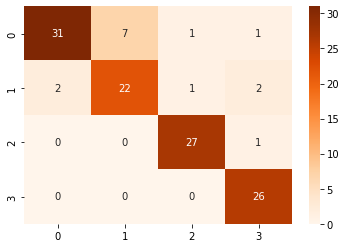

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logic Regression(tf-idf)
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  
#Predecir el valor y para el conjunto de datos de prueba
y_predict = lr_tfidf.predict(X_test_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,y_predict))
matriz_confusion= confusion_matrix(y_test, y_predict)
sns.heatmap(matriz_confusion, annot=True, cmap="Oranges")
print("LogisticRegression Accuracy Score->",accuracy_score(y_predict,y_test)*100)

              precision    recall  f1-score   support

      Cambio       0.47      0.50      0.48        40
 Combinación       0.22      0.15      0.18        27
 Comparación       0.37      0.71      0.49        28
  Igualación       0.67      0.15      0.25        26

    accuracy                           0.40       121
   macro avg       0.43      0.38      0.35       121
weighted avg       0.43      0.40      0.37       121

Logistic Regression Accuracy Score-> 39.66942148760331


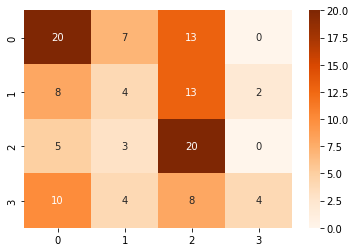

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model
#Predecir el valor y para el conjunto de datos de prueba
y_predict = lr_w2v.predict(X_test_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_test_vectors_w2v)[:,1]
print(classification_report(y_test,y_predict))
matriz_confusion= confusion_matrix(y_test, y_predict)
sns.heatmap(matriz_confusion, annot=True, cmap="Oranges")
print("Logistic Regression Accuracy Score->",accuracy_score(y_predict,y_test)*100)

Naive Bayes

              precision    recall  f1-score   support

      Cambio       0.85      0.72      0.78        40
 Combinación       0.67      0.74      0.70        27
 Comparación       0.86      0.89      0.88        28
  Igualación       0.93      1.00      0.96        26

    accuracy                           0.83       121
   macro avg       0.83      0.84      0.83       121
weighted avg       0.83      0.83      0.83       121

NB Accuracy Score-> 82.64462809917356


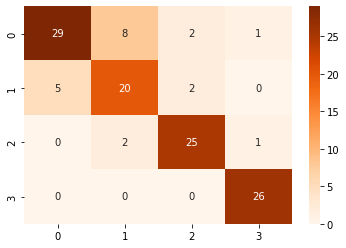

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  
#Predecir el valor y para el conjunto de datos de prueba
y_predict = nb_tfidf.predict(X_test_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,y_predict))
matriz_confusion= confusion_matrix(y_test, y_predict)
sns.heatmap(matriz_confusion, annot=True, cmap="Oranges")
print("NB Accuracy Score->",accuracy_score(y_predict,y_test)*100)

SVM 

              precision    recall  f1-score   support

      Cambio       0.73      0.86      0.79        28
 Combinación       0.85      0.68      0.75        34
 Comparación       1.00      0.92      0.96        24
  Igualación       0.90      1.00      0.95        35

    accuracy                           0.86       121
   macro avg       0.87      0.86      0.86       121
weighted avg       0.87      0.86      0.86       121

SVM Accuracy Score-> 85.9504132231405


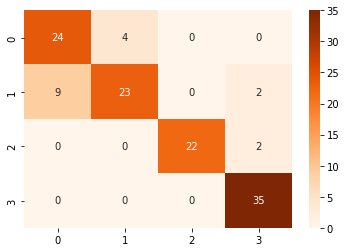

In [ ]:
#FITTING THE CLASSIFICATION MODEL Classifier - Algorithm - SVM
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',probability=True)
SVM.fit(X_train_vectors_tfidf, y_train)  
#Predecir el valor y para el conjunto de datos de prueba
predictions_SVM = SVM.predict(X_test_vectors_tfidf)
y_prob = SVM.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,predictions_SVM))
matriz_confusion= confusion_matrix(y_test, predictions_SVM)
sns.heatmap(matriz_confusion, annot=True, cmap="Oranges")
print("SVM Accuracy Score->",accuracy_score(predictions_SVM,y_test)*100)

XGB

              precision    recall  f1-score   support

      Cambio       0.77      0.86      0.81        28
 Combinación       0.81      0.76      0.79        34
 Comparación       0.92      1.00      0.96        24
  Igualación       0.94      0.86      0.90        35

    accuracy                           0.86       121
   macro avg       0.86      0.87      0.86       121
weighted avg       0.86      0.86      0.86       121

XGBC  Accuracy Score-> 85.9504132231405


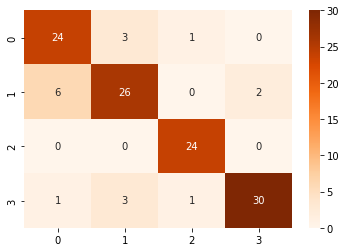

In [ ]:
#FITTING THE CLASSIFICATION MODEL Classifier - XGB
XGBC = XGBClassifier()
XGBC .fit(X_train_vectors_tfidf, y_train)  
#Predecir el valor y para el conjunto de datos de prueba
predictions_XGBC = XGBC.predict(X_test_vectors_tfidf)
y_prob = XGBC.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,predictions_XGBC))
matriz_confusion= confusion_matrix(y_test, predictions_XGBC)
sns.heatmap(matriz_confusion, annot=True, cmap="Oranges")
print("XGBC  Accuracy Score->",accuracy_score(predictions_XGBC,y_test)*100)

**Vecinos Cercanos **

KN3

              precision    recall  f1-score   support

      Cambio       0.42      0.57      0.48        28
 Combinación       0.69      0.53      0.60        34
 Comparación       0.65      0.71      0.68        24
  Igualación       0.81      0.71      0.76        35

    accuracy                           0.63       121
   macro avg       0.64      0.63      0.63       121
weighted avg       0.65      0.63      0.63       121

KNeighbors  Accuracy Score-> 62.8099173553719


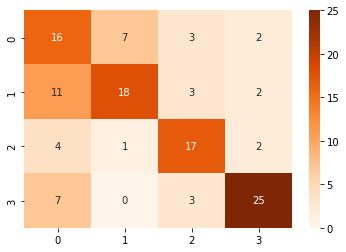

In [ ]:
#FITTING THE CLASSIFICATION MODEL Classifier - KNeighbors3
KNeighbors = KNeighborsClassifier(n_neighbors=3)
KNeighbors.fit(X_train_vectors_tfidf, y_train)  
#Predecir el valor y para el conjunto de datos de prueba
predictions_KNeighbors = KNeighbors.predict(X_test_vectors_tfidf)
y_prob = KNeighbors.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,predictions_KNeighbors))
matriz_confusion= confusion_matrix(y_test, predictions_KNeighbors)
sns.heatmap(matriz_confusion, annot=True, cmap="Oranges")
print("KNeighbors  Accuracy Score->",accuracy_score(predictions_KNeighbors,y_test)*100)

KN5

              precision    recall  f1-score   support

      Cambio       0.45      0.68      0.54        28
 Combinación       0.59      0.38      0.46        34
 Comparación       0.58      0.62      0.60        24
  Igualación       0.74      0.66      0.70        35

    accuracy                           0.58       121
   macro avg       0.59      0.59      0.58       121
weighted avg       0.60      0.58      0.58       121

KNeighbors  Accuracy Score-> 57.85123966942148


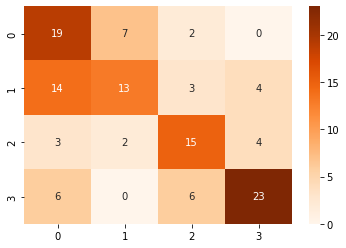

In [ ]:
#FITTING THE CLASSIFICATION MODEL Classifier - KNeighbors5
KNeighbors = KNeighborsClassifier(n_neighbors=5)
KNeighbors.fit(X_train_vectors_tfidf, y_train)  
#Predecir el valor y para el conjunto de datos de prueba
predictions_KNeighbors = KNeighbors.predict(X_test_vectors_tfidf)
y_prob = KNeighbors.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,predictions_KNeighbors))
matriz_confusion= confusion_matrix(y_test, predictions_KNeighbors)
sns.heatmap(matriz_confusion, annot=True, cmap="Oranges")
print("KNeighbors  Accuracy Score->",accuracy_score(predictions_KNeighbors,y_test)*100)

KN7

              precision    recall  f1-score   support

      Cambio       0.50      0.71      0.59        28
 Combinación       0.68      0.50      0.58        34
 Comparación       0.60      0.62      0.61        24
  Igualación       0.74      0.66      0.70        35

    accuracy                           0.62       121
   macro avg       0.63      0.62      0.62       121
weighted avg       0.64      0.62      0.62       121

KNeighbors  Accuracy Score-> 61.98347107438017


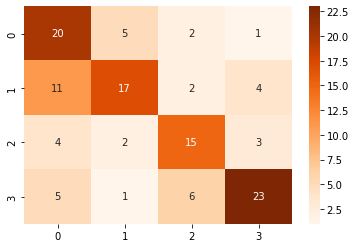

In [ ]:
#FITTING THE CLASSIFICATION MODEL Classifier - KNeighbors7
KNeighbors = KNeighborsClassifier(n_neighbors=7)
KNeighbors.fit(X_train_vectors_tfidf, y_train)  
#Predecir el valor y para el conjunto de datos de prueba
predictions_KNeighbors = KNeighbors.predict(X_test_vectors_tfidf)
y_prob = KNeighbors.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,predictions_KNeighbors))
matriz_confusion= confusion_matrix(y_test, predictions_KNeighbors)
sns.heatmap(matriz_confusion, annot=True, cmap="Oranges")
print("KNeighbors  Accuracy Score->",accuracy_score(predictions_KNeighbors,y_test)*100)

Radom Forest

              precision    recall  f1-score   support

      Cambio       0.87      0.93      0.90        28
 Combinación       0.93      0.82      0.87        34
 Comparación       1.00      1.00      1.00        24
  Igualación       0.95      1.00      0.97        35

    accuracy                           0.93       121
   macro avg       0.94      0.94      0.94       121
weighted avg       0.93      0.93      0.93       121

RandomForest Accuracy Score-> 93.38842975206612


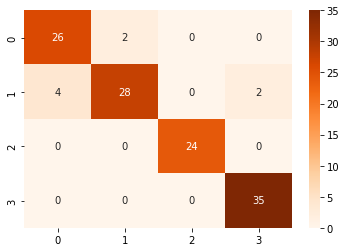

In [ ]:
#FITTING THE CLASSIFICATION MODEL Classifier - Random Forest 
RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_vectors_tfidf, y_train)  
#Predecir el valor y para el conjunto de datos de prueba
predictions_RandomForest = RandomForest.predict(X_test_vectors_tfidf)
y_prob = RandomForest.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,predictions_RandomForest))
matriz_confusion= confusion_matrix(y_test, predictions_RandomForest)
sns.heatmap(matriz_confusion, annot=True, cmap="Oranges")
print("RandomForest Accuracy Score->",accuracy_score(predictions_RandomForest,y_test)*100)

In [ ]:
#Preprocesamiento del nuevo conjunto de datos
df_test['clean_text'] = df_test['Problema'].apply(lambda x: finalpreprocess(x)) #preprocesamiento de los datos 
X_test=df_test['clean_text'] 
#convirtiendo palabras a datos numéricos usando tf-idf
X_vector=tfidf_vectorizer.transform(X_test)
#use el mejor modelo para predecir el valor 'objetivo' para el nuevo conjunto de datos 
y_predict = RandomForest.predict(X_vector)      
y_prob = RandomForest.predict_proba(X_vector)[:,1]
df_test['predict_prob']= y_prob
df_test['target']= y_predict
final=df_test[['clean_text','target']].reset_index(drop=True)
print(final)

NameError: ignored